In [8]:
import random
from game import Game, Move, Player
from copy import deepcopy
import sys
import numpy as np

class RandomPlayer(Player):
    def __init__(self) -> None:
        super().__init__()

    def make_move(self, game: 'Game') -> tuple[tuple[int, int], Move]:
        #game.print()
        from_pos = (random.randint(0, 4), random.randint(0, 4))
        move = random.choice([Move.TOP, Move.BOTTOM, Move.LEFT, Move.RIGHT])
        return from_pos, move

In [9]:

class MinMax_AlphaBeta_Player(Player):
    def __init__(self, depth_limit=2) -> None:
        super().__init__()
        self.DEPTH_LIMIT = depth_limit

    def make_move(self, game: 'Game') -> tuple[tuple[int, int], Move]:
        _, move_sequence = self.minMax_alphaBeta(game,0, -float('inf'), float('inf'), True)
        return move_sequence
    
    def minMax_alphaBeta(self, game,current_depth, alpha, beta, is_maximizing, ):
        # Base case: Check if the game has a winner or if the current depth equals the depth limit
        if game.check_winner() != -1 or current_depth == self.DEPTH_LIMIT:
            # Evaluate the game state based on the winner
            if game.check_winner() == 0:  # If player 0 wins
                return 1, None
            elif game.check_winner() == 1:  # If player 1 wins
                return -1, None
            else:  # If there's no winner, evaluate based on the difference in counts of player pieces
                zero_count = np.count_nonzero(game._board == 0)
                one_count = np.count_nonzero(game._board == 1)
                return (zero_count - one_count) / 100, None

        # Prepare for the next level of depth
        current_depth += 1

        # Initialize variables for tracking the best score and move
        if is_maximizing:
            best_score = float('-inf')
        else:
            best_score = float('inf')
        best_move = None

        # Determine the current player based on maximizing or minimizing state
        current_player = 0 if is_maximizing else 1

        # Generate all possible moves for the current player
        for move in self.possible_moves(game, current_player):
            # Create a new game state by applying the current move
            new_game_state = self.new_game_state(game, move, current_player)

            # Recursively call minMax for the new game state, flipping the is_maximizing flag
            score, _ = self.minMax_alphaBeta(new_game_state, current_depth, alpha, beta, not is_maximizing)

            # Update the best score and move based on maximizing or minimizing condition
            if is_maximizing and score > best_score:
                best_score, best_move = score, move
                alpha = max(alpha, best_score)  # Update alpha
                if beta <= alpha:  # Cut-off condition
                    break  # Beta cut-off: No need to explore further as the minimizing player would avoid this branch
            elif not is_maximizing and score < best_score:
                best_score, best_move = score, move
                beta = min(beta, score) # Update beta
                if alpha > beta: # Cut-off condition
                    break  # Alpha cut-off: No need to explore further as the maximizing player would avoid this branch

        # Return the best score and the corresponding move that leads to that score
        return best_score, best_move
    
    def new_game_state(self, game, move, player):
        # Create a deep copy of the game object to avoid modifying the original game state
        game_copy = deepcopy(game)

        # Extract the position and action from the move tuple
        position, action = move

        # Apply the move to the copied game state
        game_copy.move(position, action, player)

        # This new game state reflects the board after the move has been made
        return game_copy
    def valid_move(self, position, action):
            # True if the move does not attempt to go beyond the board's boundaries; otherwise, False.
        return not ((position[1] == 0 and action == Move.TOP)  # Can't move up from the top edge
                or (position[1] == 4 and action == Move.BOTTOM)  # Can't move down from the bottom edge
                or (position[0] == 0 and action == Move.LEFT)  # Can't move left from the left edge
                or (position[0] == 4 and action == Move.RIGHT))  # Can't move right from the right edge

    def possible_moves(self, game, player):
        # Generate potential positions on the edges of the board that are valid for the player.
        potential_positions = [(i, j) for i in range(5) for j in range(5)
                            if (i == 0 or i == 4 or j == 0 or j == 4)  # Position is on the edge
                            and (game._board[j, i] == -1 or game._board[j, i] == player)]  # Position is unoccupied or occupied by the player

        # Generate all possible moves from these positions, considering all four directions.
        potential_moves = [(position, action) for position in potential_positions for action in [Move.TOP, Move.BOTTOM, Move.LEFT, Move.RIGHT]]

        # Filter out moves that are not valid (i.e., would move off the board).
        potential_moves = [(position, action) for position, action in potential_moves if self.valid_move(position, action)]

    # Return the filtered list of valid moves.
        return potential_moves

In [10]:
def simulate_games(num_games=1000):
    wins = {0: 0, 1: 0, 'draws': 0}
    
    for _ in range(num_games):
        game = Game()  # Initialize a new game instance
        player1 = MinMax_AlphaBeta_Player(depth_limit=2)
        player2 = RandomPlayer()
        
        winner = game.play(player1, player2)
        if winner != -1:
            wins[winner] += 1
        else:
            wins['draws'] += 1  

    return wins

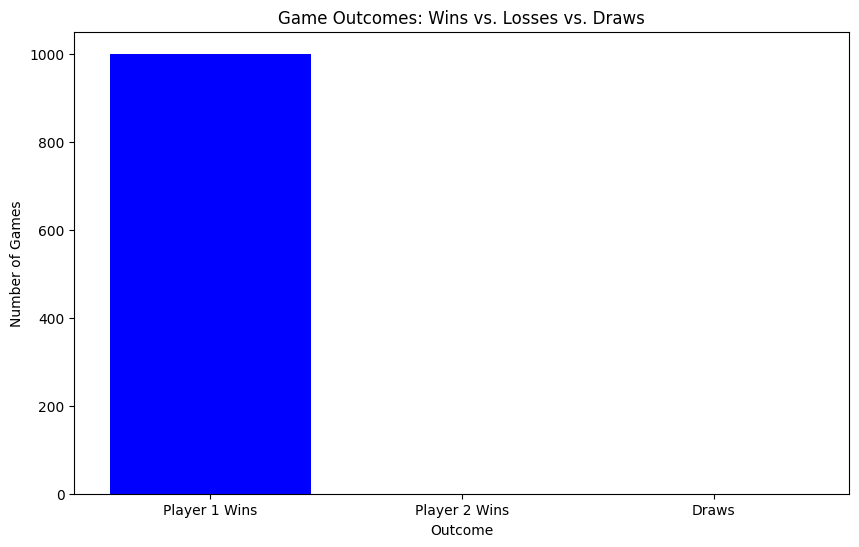

In [11]:
import matplotlib.pyplot as plt

wins = simulate_games(num_games=1000)


# Data for plotting
labels = ['Player 1 Wins', 'Player 2 Wins', 'Draws']
values = [wins[0], wins[1], wins['draws']]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'red', 'green'])
plt.xlabel('Outcome')
plt.ylabel('Number of Games')
plt.title('Game Outcomes: Wins vs. Losses vs. Draws')
plt.xticks(labels)
plt.show()

In [12]:
print(wins)

{0: 1000, 1: 0, 'draws': 0}
